In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import yfinance as yf
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

/Users/peng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/peng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = yf.download('SPY', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
class EDA_stock():
    def __init__(self, df):
        self.df = df
    def profiling(self,cols=["Adj Close"]):
        # head
        print("The head of the DataFrame:")
        display(self.df.head())
        print("\n")
        
        # shape
        print("The shape of the DataFrame:")
        display(self.df.shape)
        print("\n")
        
        # index
        print("The time stamp for each record:")
        display(df.index)
        print("\n")
        
        # plot the distribution of the day
        print("The distribution of the weekday recorded:")
        sns.countplot(x=df.index.strftime('%A'))
        plt.show()
        print("\n")
        
        # gap
        print("The start date and the current end date for the data:")
        display(df.index[0],df.index[-1])
        print("\n")
        
        # nan check
        print("If there is missing values in the data:")
        display(self.df.isna().sum())
        print("\n")
        
        # describe
        print("Describe the time series:")
        display(self.df.describe())
        print("\n")
        
        for col in cols:
            # plot time series values
            print("Plot the time series:")
            plt.figure(figsize=(12,8))
            self.plot(col)
            plt.title = f"{col} Price"
            plt.show()
            
            # plot diff one day
            print("Plot the change in the time series:")
            plt.figure(figsize=(12,8))
            self.df[col].diff().plot()
            plt.title = f"{col} Price Change"
            plt.show()
            # plot diff acf
            print(f"Plot the Auto-Correlation Function of {col} Price Change:")
            self.plot_acf(col)
            plt.show()
            # plot diff pacf
            print(f"Plot the Partial Auto-Correlation Function of {col} Price Change:")
            self.plot_pacf(col)
            plt.show()
            
    def plot(self,col="Adj Close"):
        self.df[col].plot()
        
    def plot_acf(self,col="Adj Close"):
        plot_acf(self.df[col].diff().dropna())
        
    def plot_pacf(self,col="Adj Close"):
        plot_pacf(self.df[col].diff().dropna())

The head of the DataFrame:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.547977,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.729683,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.784206,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.056755,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.165779,531500




The shape of the DataFrame:


(7398, 6)



The time stamp for each record:


DatetimeIndex(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03',
               '1993-02-04', '1993-02-05', '1993-02-08', '1993-02-09',
               '1993-02-10', '1993-02-11',
               ...
               '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-06',
               '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-13', '2022-06-14'],
              dtype='datetime64[ns]', name='Date', length=7398, freq=None)



The distribution of the weekday recorded:


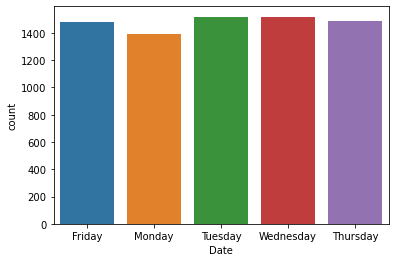



The start date and the current end date for the data:


Timestamp('1993-01-29 00:00:00')

Timestamp('2022-06-14 00:00:00')



If there is missing values in the data:


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



Describe the time series:


,Open,High,Low,Close,Adj Close,Volume
count,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7.398000e+03
mean,157.690825,158.625978,156.643172,157.686414,131.722799,8.459146e+07
std,93.066539,93.526975,92.533016,93.063181,99.365501,9.458840e+07
min,43.343750,43.531250,42.812500,43.406250,25.239080,5.200000e+03
25%,102.765625,103.429998,101.742815,102.583439,71.260592,8.643200e+06
50%,129.514999,130.280624,128.605003,129.480003,93.974548,6.025815e+07
75%,200.072502,201.060005,198.777500,200.122501,175.116558,1.194114e+08
max,479.220001,479.980011,476.059998,477.709991,476.230530,8.710263e+08




Plot the time series:


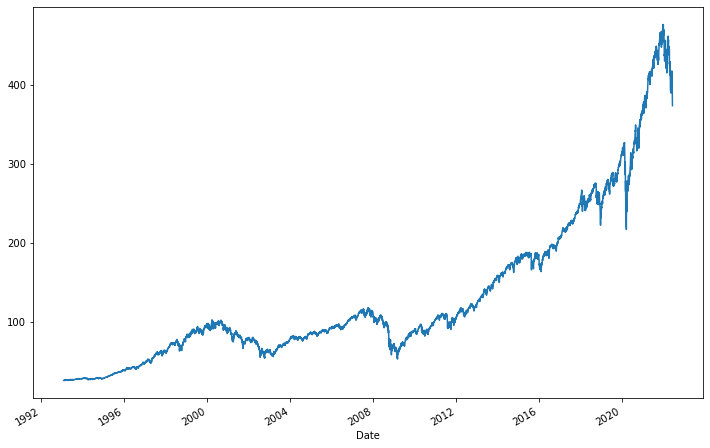

Plot the change in the time series:


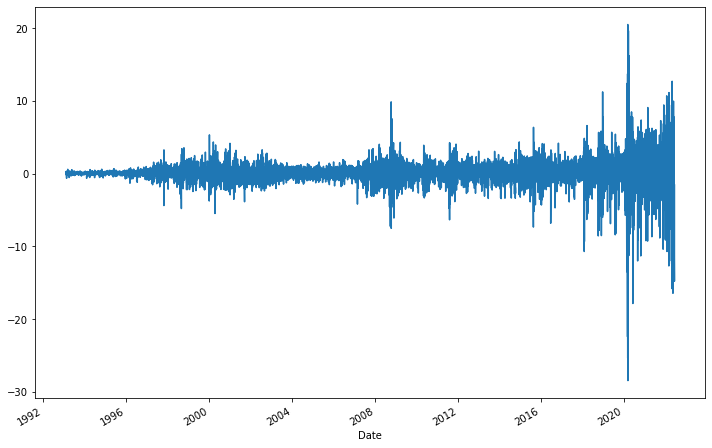

Plot the Auto-Correlation Function of Adj Close Price Change:


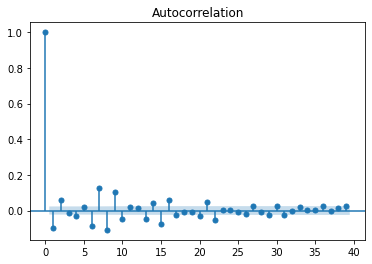

Plot the Partial Auto-Correlation Function of Adj Close Price Change:


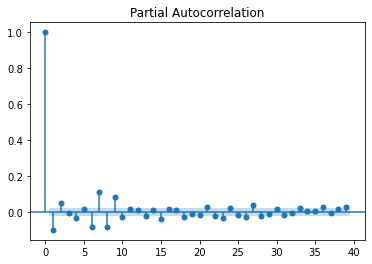

In [4]:
eda = EDA_stock(df)
eda.profiling()

**Findings:**
- We see that 

In [5]:
class StockPredictions():
    def __init__(self, train, test, p=4,q=1, model=None, diff = False):
        self.train = train
        self.test = test
        self.p = p
        self.q = q
        self.d= 1 if not diff else 0
        # baseline model
        self.baseline_model = ARIMA(pd.concat([self.train,self.test]), order=(self.p, self.d, self.q))
        self.baseline_history = []
        self.baseline_RMSE = None
        # model
        self.model = model
        self.pred = []
        self.history = []
       
        
    def baseline_predict_all(self):
        self.baseline_pred = []
        self.baseline_history = self.train.to_list()
        for t in tqdm(range(len(self.test))):
            bsl_model = ARIMA(self.baseline_history, order = (self.p, self.d ,self.q))
            bsl_fit = bsl_model.fit()
            self.baseline_pred.append(bsl_fit.forecast()[0])
            self.baseline_history.append(self.test[t])
        self.baseline_RMSE = np.sqrt(((self.test.to_numpy() - np.array(self.baseline_pred))**2).sum()/len(self.test.index))
        
    def baseline_predict(self, scope=1):
        bsl_fit = self.baseline_model.fit()
        return pd.Series(bsl_fit.forecast(steps = scope))
    
    def plot_baseline_performance(self):
        plt.figure(figsize=(12,8))
        ax = self.test.plot(label="y_true")
        pd.Series(self.baseline_pred,index=self.test.index).plot(label="y_pred_baseline", ax = ax)
        ax.grid(True, which="both")
        ax.legend()
        ax.set_title(f"RMSE_Baseline: {self.baseline_RMSE:.4f}")
        
#     def plot_model_performance(self):

In [6]:
loc = int(np.floor(len(df.index)*0.99))
X_train1 = df.iloc[:loc]["Adj Close"].diff().dropna()
X_test1 = df.iloc[loc:]["Adj Close"].diff().dropna()

In [7]:
sp1 = StockPredictions(X_train1,X_test1,diff=True)

In [8]:
sp1.baseline_predict_all()

  0%|          | 0/73 [00:00<?, ?it/s]

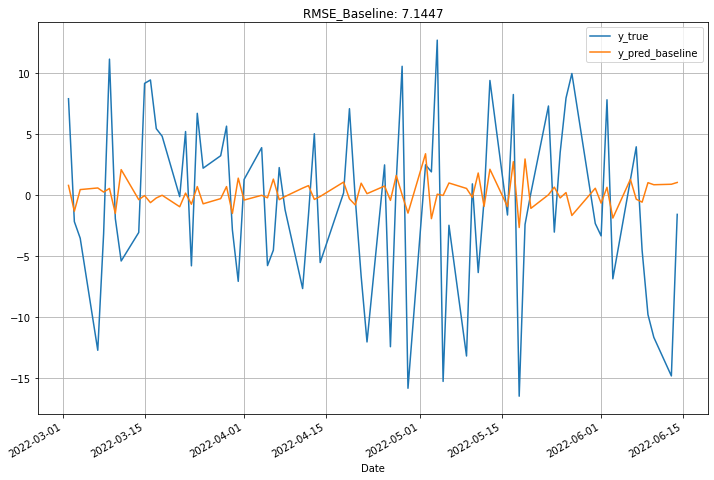

In [9]:
sp1.plot_baseline_performance()

<AxesSubplot:>

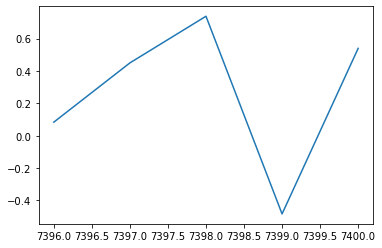

In [10]:
sp1.baseline_predict(5).plot()

  0%|          | 0/74 [00:00<?, ?it/s]

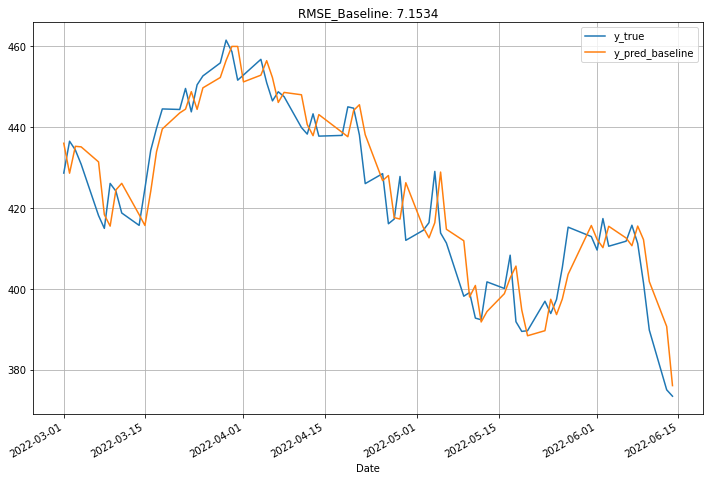

In [11]:
X_train2 = df.iloc[:loc]["Adj Close"]
X_test2 = df.iloc[loc:]["Adj Close"]
sp2 = StockPredictions(X_train2,X_test2)
sp2.baseline_predict_all()
sp2.plot_baseline_performance()

<AxesSubplot:>

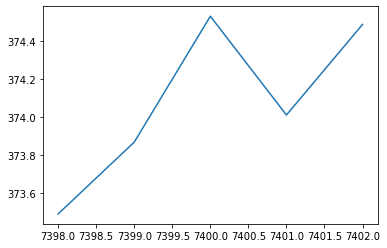

In [12]:
sp2.baseline_predict(5).plot()

In [13]:
# plotting